In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

rolling_period = 20

#write a function to open a json file and return a dataframe
def read_json(path, env, algo, seed):
    with open(path + "metrics.json", "r") as f:
        data = json.load(f)

    data = data[env][algo][seed]
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0]}
        records[int(n)] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    df[f"rolling_{rolling_period}"] = df["mean_episode_returns"].rolling(rolling_period).mean()
    
    return df

In [15]:
root = "../results/ppo/"
env = "CartPole-v1"
# env = "SpaceInvaders-MinAtar"
# data_1 = read_json(root + "env1/", env, "PPO", "seed_42")
d_4 = read_json(root + "env4/", env, "PPO", "seed_42")

eroot = "../results/ppoe/"
ed_4 = read_json(eroot + "env4/", env, "ppoe", "seed_42")


<Axes: >

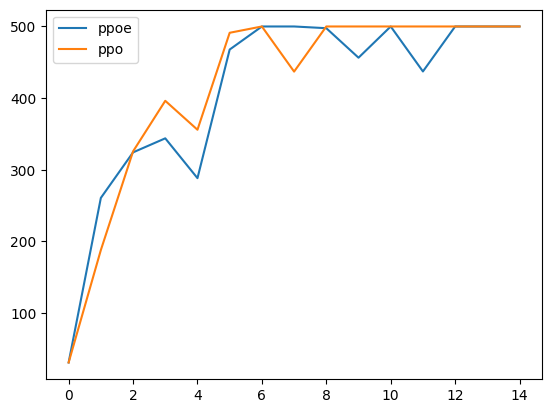

In [17]:


# ax = ed_4.plot(y="rolling_20", label="ppoe")
# d_4.plot(y="rolling_20", label="ppo", ax=ax)


ax = ed_4.plot(y="mean_episode_returns", label="ppoe")
d_4.plot(y="mean_episode_returns", label="ppo", ax=ax)


In [1]:
def read_system_json(algo, env, env_n, seed):
    seed = f"seed_{seed}"
    path = f"../results/{algo}/{env}/envs_{env_n}/{seed}/"
    with open(path + "metrics.json", "r") as f:
        data = json.load(f)

    data = data[env][algo][seed]
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0]}
        records[int(n)] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    df[f"rolling_{rolling_period}"] = df["mean_episode_returns"].rolling(rolling_period, min_periods=1).mean()
    
    return df

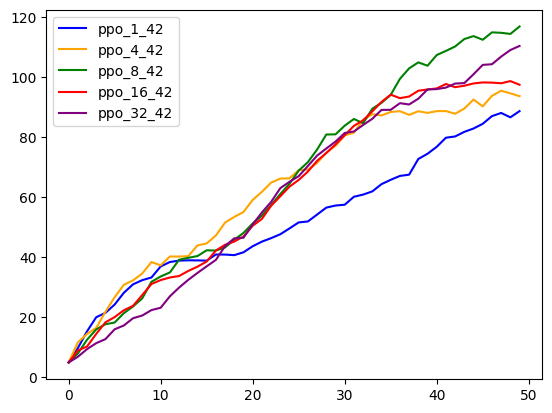

In [5]:
env = "SpaceInvaders-MinAtar"

env_ns = [1, 4, 8, 16, 32]
seeds = [42]
colors = ['blue', "orange", 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ppo", env, env_n, seed)
        # df.plot(y="mean_episode_returns", alpha=0.2, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax, color=colors[i])

        i += 1



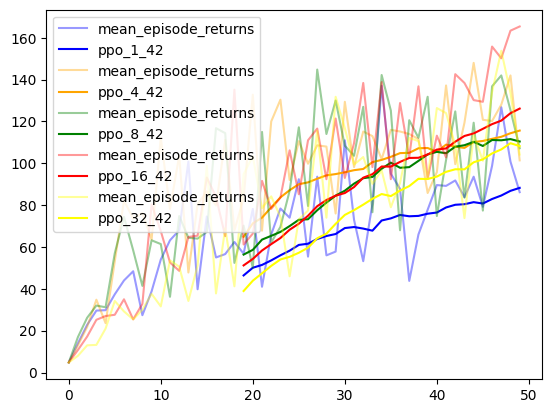

In [55]:
env = "SpaceInvaders-MinAtar"

env_ns = [1, 4, 8, 16, 32]
seeds = [42]
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df = read_system_json("ppo_ewma", env, env_n, seed)
        df.plot(y="mean_episode_returns", alpha=0.4, ax=ax, color=colors[i])
        df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax, color=colors[i])

        i += 1



In [1]:
env = "SpaceInvaders-MinAtar"

env_ns = [1, 4, 8, 16, 32]
seeds = [42]
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

ax = plt.gca()

i = 0
for env_n in env_ns:
    for seed in seeds:
        df_e = read_system_json("ppo_ewma", env, env_n, seed)
        df = read_system_json("ppo", env, env_n, seed)

        if df_e is not None:
            df_e.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax)

        if df is not None:
            df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax)


        i += 1


NameError: name 'plt' is not defined

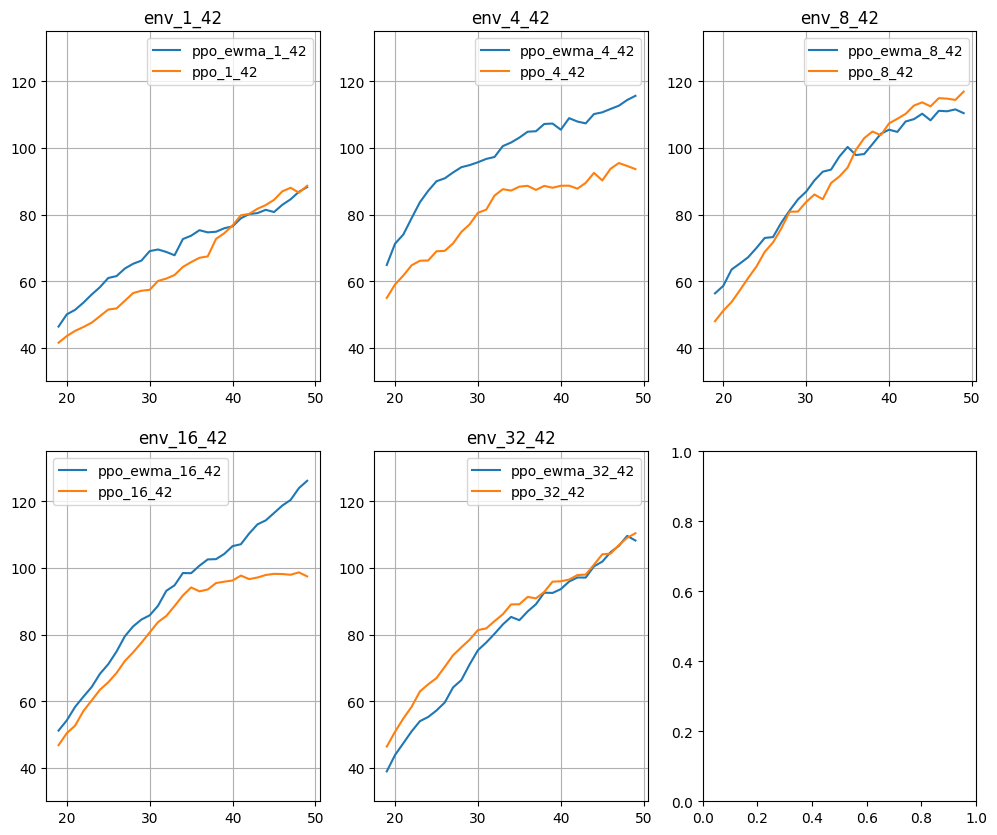

In [54]:
env = "SpaceInvaders-MinAtar"

env_ns = [1, 4, 8, 16, 32]
seeds = [42]
colors = ['blue', "orange", 'green', 'red', 'yellow', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# ax = plt.gca()
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(12, 10))

i = 0
for env_n in env_ns:
    for seed in seeds:
        ax = axs[i//3][i%3]
        df = read_system_json("ppo_ewma", env, env_n, seed)
        df.plot(y="rolling_20", label=f"ppo_ewma_{env_n}_{seed}", ax=ax)

        df = read_system_json("ppo", env, env_n, seed)
        df.plot(y="rolling_20", label=f"ppo_{env_n}_{seed}", ax=ax)

        ax.grid(True)
        ax.set_title(f"env_{env_n}_{seed}")
        ax.set_ylim(30, 135)


        i += 1
